In [2]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [9]:
df = pd.read_csv(r"C:\Users\Shobith\Documents\Git\SMS Spam Classifier\Data\spam.csv",encoding="ISO-8859-1")

In [10]:
df.head()

,Label,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [11]:
df.isnull().sum()

Label      0
Message    0
dtype: int64

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Label    5572 non-null   object
 1   Message  5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [13]:
df.describe()

,Label,Message
count,5572,5572
unique,2,5169
top,ham,"Sorry, I'll call later"
freq,4825,30


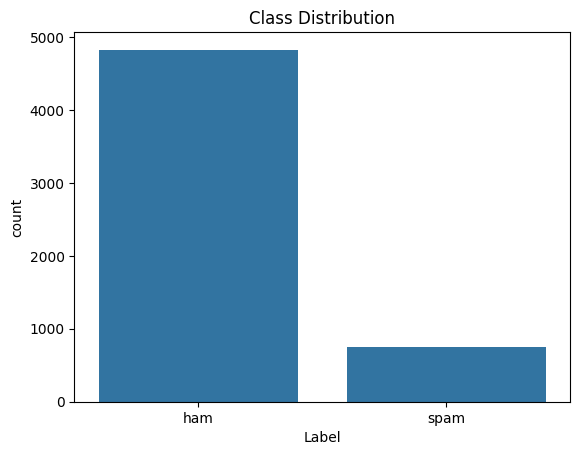

In [15]:
# Count plot for the 'Label' column
sns.countplot(x='Label', data=df)
plt.title('Class Distribution')
plt.show()

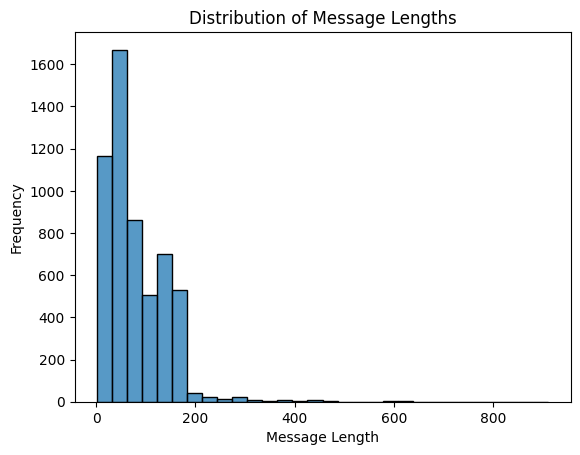

In [16]:
# Create a new column for message length
df['Message_Length'] = df['Message'].apply(len)

# Distribution of message lengths
sns.histplot(df['Message_Length'], bins=30)
plt.title('Distribution of Message Lengths')
plt.xlabel('Message Length')
plt.ylabel('Frequency')
plt.show()

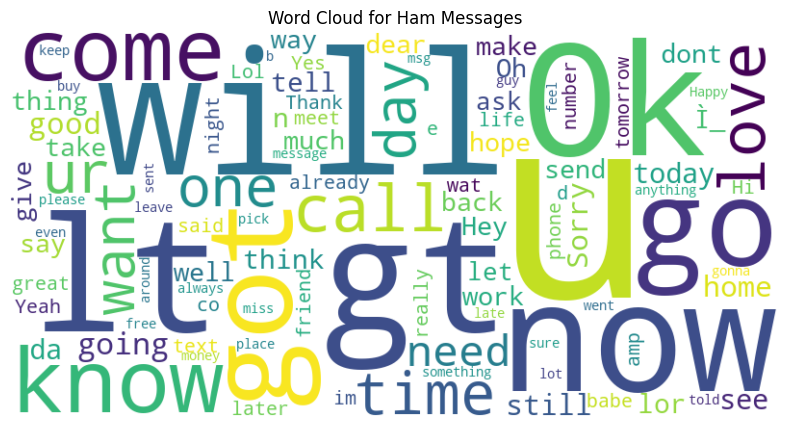

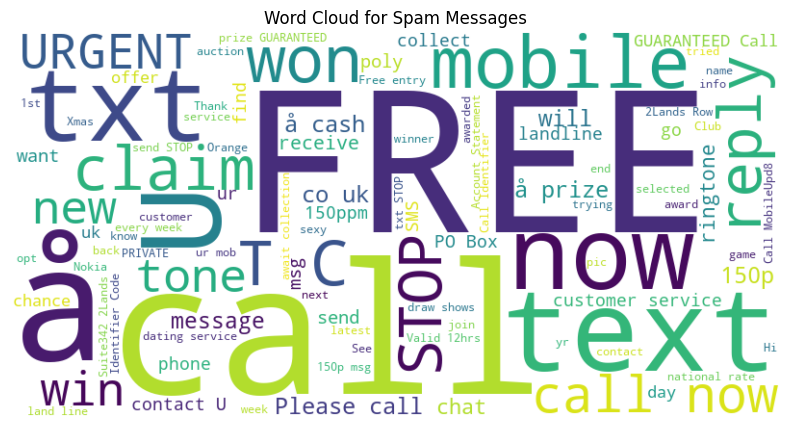

In [19]:
from wordcloud import WordCloud

# Word cloud for ham messages
ham_messages = ' '.join(df[df['Label'] == 'ham']['Message'])
wordcloud_ham = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(ham_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_ham, interpolation='bilinear')
plt.title('Word Cloud for Ham Messages')
plt.axis('off')
plt.show()

# Word cloud for spam messages
spam_messages = ' '.join(df[df['Label'] == 'spam']['Message'])
wordcloud_spam = WordCloud(width=800, height=400, max_words=100, background_color='white').generate(spam_messages)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud_spam, interpolation='bilinear')
plt.title('Word Cloud for Spam Messages')
plt.axis('off')
plt.show()

In [20]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [21]:
X = df['Message']
y = df['Label']

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
vectorizer = CountVectorizer()
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

In [24]:
model = MultinomialNB()
model.fit(X_train_vec, y_train)

MultinomialNB()

In [25]:
y_pred = model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Accuracy: 0.98
Confusion Matrix:
[[963   2]
 [ 16 134]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.98      1.00      0.99       965
        spam       0.99      0.89      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [26]:
new_messages = ["Congratulations! You've won a prize.", "Let's meet at the park tomorrow."]
new_messages_vec = vectorizer.transform(new_messages)
predictions = model.predict(new_messages_vec)

print(f'Predictions for new messages: {predictions}')

Predictions for new messages: ['spam' 'ham']


In [27]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Instantiate the CountVectorizer
vectorizer = CountVectorizer()

# Transform the training and testing data
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'alpha': [0.1, 0.5, 1.0]}  # Adjust the alpha values as needed
grid_search = GridSearchCV(model, param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train_vec, y_train)

# Get the best model from the grid search
best_model = grid_search.best_estimator_

# Fit the best model to the training data
best_model.fit(X_train_vec, y_train)

# Make predictions on the test data
y_pred = best_model.predict(X_test_vec)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f'Best Model Hyperparameters: {grid_search.best_params_}')
print(f'Accuracy: {accuracy:.2f}')
print(f'Confusion Matrix:\n{conf_matrix}')
print(f'Classification Report:\n{class_report}')

Best Model Hyperparameters: {'alpha': 0.1}
Accuracy: 0.98
Confusion Matrix:
[[961   4]
 [ 14 136]]
Classification Report:
              precision    recall  f1-score   support

         ham       0.99      1.00      0.99       965
        spam       0.97      0.91      0.94       150

    accuracy                           0.98      1115
   macro avg       0.98      0.95      0.96      1115
weighted avg       0.98      0.98      0.98      1115



In [28]:
# Predictions for new messages
new_messages = ["Congratulations! You've won a prize.", "Let's meet at the park tomorrow."]
new_messages_vec = vectorizer.transform(new_messages)
predictions = best_model.predict(new_messages_vec)

print(f'Predictions for new messages: {predictions}')

Predictions for new messages: ['spam' 'ham']


In [29]:
import joblib

# Assuming 'model' is your trained model
joblib.dump(best_model, 'sms_classifier_model.joblib')

['sms_classifier_model.joblib']

In [30]:
import tkinter as tk
from tkinter import ttk, messagebox
from sklearn.feature_extraction.text import CountVectorizer
import joblib

# Load the model
model = joblib.load('sms_classifier_model.joblib')

def classify_sms():
    sms_text = sms_entry.get()
    vectorized_sms = vectorizer.transform([sms_text])
    prediction = model.predict(vectorized_sms)
    result_label.config(text=f'Category: {prediction[0]}')

# Create Tkinter interface
    
def clear_input():
    sms_entry.delete(0, tk.END)
    result_label.config(text="")

def show_about_dialog():
    messagebox.showinfo("About", "SMS Classifier")

# Create main window
root = tk.Tk()
root.title("SMS Classifier")

# Create GUI components
frame = ttk.Frame(root)
sms_label = ttk.Label(frame, text="Enter SMS:")
sms_entry = ttk.Entry(frame, width=40)
classify_button = ttk.Button(frame, text="Classify", command=classify_sms)
clear_button = ttk.Button(frame, text="Clear", command=clear_input)
result_label = ttk.Label(frame, text="Category: ")
about_button = ttk.Button(frame, text="About", command=show_about_dialog)

# Layout
frame.grid(row=0, column=0, padx=20, pady=10, sticky='nsew')
sms_label.grid(row=0, column=0, padx=10, pady=10, sticky="E")
sms_entry.grid(row=0, column=1, padx=10, pady=10, sticky="W")
classify_button.grid(row=1, column=0, pady=10)
clear_button.grid(row=1, column=1, pady=10)
result_label.grid(row=2, column=0, columnspan=2, pady=10)
about_button.grid(row=3, column=0, columnspan=2, pady=10)

# Set up padding and resizing
for child in frame.winfo_children():
    child.grid_configure(padx=10, pady=5)
    child.grid_configure(sticky='WE')

# Start Tkinter event loop
root.mainloop()
